In [1]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from statannot import add_stat_annotation

In [3]:
questions = "GF_TutorialHelpful,GF_BasicMechanicTime,GF_SpecialSkillTime,GF_TutorialHelpRemember,GF_LearnedAllSkill,GF_InvolvedInGame,GF_NewBlockSame,GF_HintUseless"
questions = questions.split(',')

full_df = pd.read_csv('all_data.csv')

# Change age to year 20s, 30s,...
full_df['Ages'] = full_df['Age'].apply(lambda x: str(x)[0] + '0s')

print(len(set(full_df['User'])))

89


In [4]:
labels = ['Q_BombPiece', 'Q_CrossPiece', 'Q_HorizontalPiece', 'Q_RainbowPiece', 'Q_RocketPiece', 'Q_VerticalPiece']

# Add summed up column of the labels
full_df['Q_Sum'] = full_df[labels].sum(axis=1)


<Figure size 640x480 with 0 Axes>

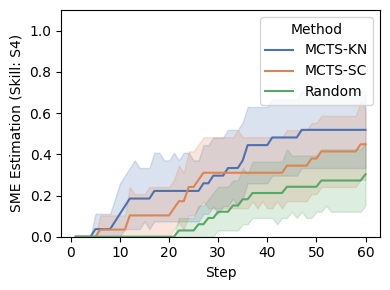

<Figure size 640x480 with 0 Axes>

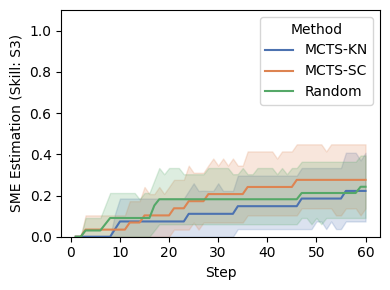

<Figure size 640x480 with 0 Axes>

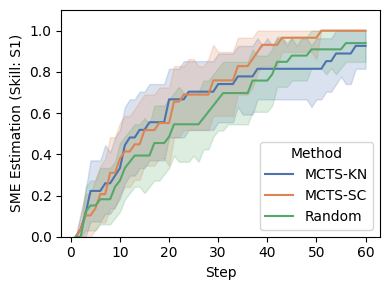

<Figure size 640x480 with 0 Axes>

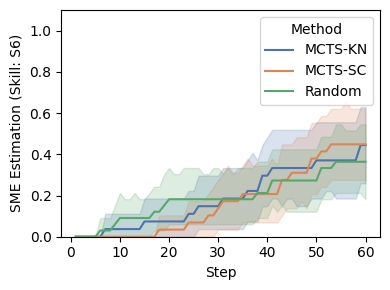

<Figure size 640x480 with 0 Axes>

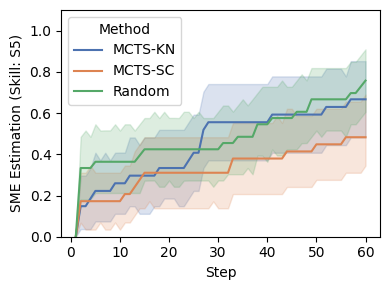

<Figure size 640x480 with 0 Axes>

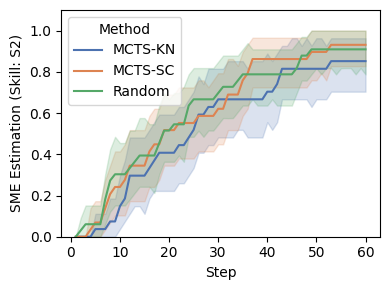

In [27]:
lp_df = full_df.copy()

labels = {
    'L_BombPiece': 'S4',
    'L_CrossPiece': 'S3',
    'L_HorizontalPiece': 'S1',
    'L_RainbowPiece': 'S6',
    'L_RocketPiece': 'S5',
    'L_VerticalPiece': 'S2'
}


lp_df['Method'] = lp_df['Method'].map({
    'MCTS_Knowledge': 'MCTS-KN',
    'MCTS_Score': 'MCTS-SC',
    'Random': 'Random',
})

for label, skill_num in labels.items():
    plt.clf()
    plt.figure(figsize=(4, 3))
    sns.set_palette('deep')
    sns.lineplot(data=lp_df, x="L_Step", y=label, hue="Method")
    plt.ylim(0, 1.1)
    plt.xlabel('Step')
    plt.ylabel(f'SME Estimation (Skill: {skill_num})')
    plt.tight_layout()
    plt.savefig(f'LC_{skill_num}.pdf')
    plt.savefig(f'LC_{skill_num}.png', dpi=300)
    plt.show()
